# Challenge Name: Entertainment through CleverCogs

The project carries out a structured analysis of a portion of the data provided by Blackwood Homes and Care, which has been providing accessible housing and high-quality care & support across Scotland to people with an extensive range of disabilities and housing/care needs. It provides a system called CleverCogs to its customers, a safe, secure, and specially designed digital platform for disabled and older people to do many things. The entertainment section is one of the crucial features of the platform, which enables users to access music, games, online content, etc., and catch up on their interests. In addition, users can stay in touch with family and friends, access information they are interested in, and receive reminders of appointments, care visits or medication they need to take, etc. 

The challenge is to identify and understand how customers use the entertainment features and how different factors (age, gender, location, medical conditions, time of use, etc.) impact users' entertainment engagement. The data analysis of the service would enable support for Blackwood's ongoing development purpose and be of interest to the users themselves if the visualization allows users to see their own data and perhaps make comparisons with the whole group. 

The datasets are mainly composed of data of Age, Gender, Medical Condition, Location, Link Type, Link Title, and Use of Time, etc. Within our group, each of us is doing an independent piece of analysis on a different part (among Age, Gender, Medical Condition, Location, Link Type, Link Title, and Use of Time) of the data. My part is "Age", which focuses on the correlations between "Age" and other factors.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt

# Description

In this project, we have three tabular datasets, all presented in .xlsx form

- "CCDate2018-2021.xlsx" has the entertainment data

- "Users2021.xlsx" is the data on where people live and their gender and ages

- "CustomerMedicalConditions04Nov21.xlsx" mainly contains the information of users' health status

In [2]:
# read all the data (how large and complex)
users_2021 = pd.read_excel("Users2021.xlsx")
ccdate = pd.read_excel("CCDate2018-2021.xlsx")
medical_conditions = pd.read_excel("CustomerMedicalConditions04Nov21.xlsx")
users_2021

,User ID,VisitorID,ExternalID,Birth date,Gender,Location
0,213,7447300C-B772-4779-9AC8-0A28B5BBBFF4,NaN,NaT,Male,NaN
1,298,F298F6B9-77E2-459D-96EE-F588FA2BC5B1,NaN,NaT,Male,NaN
2,314,5E896124-3F0E-4D01-915D-BAE9B3F1A39A,NaN,NaT,Male,NaN
3,370,E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C,999.0,NaT,Male,Aberdeen Council
4,387,D7686862-D926-49CB-93CA-B8676CA2A91A,NaN,NaT,Male,NaN
...,...,...,...,...,...,...
3636,5671,5CEA1684-0922-49E7-859D-40A8DF20B4B6,9601.0,2002-09-24,Female,National/North/Stirling Council/Forth Valley C@H
3637,5672,7AA63722-737A-4313-966A-320842DD26C9,NaN,NaT,Female,National
3638,5673,1A7A9E9B-F89A-444C-9817-C5E2C2D06BFA,NaN,NaT,Female,National
3639,5674,F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8,9602.0,2001-12-22,Female,National/EAST /Edinburgh City Council/Edinburg...


In [3]:
ccdate

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL
0,2021-11-01 17:10:52.770,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Comfort Break,Services,-1|329|10|Comfort Break|1|,LIST
1,2021-11-01 17:10:49.690,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Ask For,Category,NaN,NaN
2,2021-11-01 17:08:51.533,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care Team,Category,NaN,NaN
3,2021-11-01 17:08:41.883,618B75EE-0A49-454C-82B7-6827A9BBA6A5,8899.0,User,67 Glamis Road,My Care,Category,NaN,NaN
4,2021-11-01 17:07:40.843,F7331B56-15F0-4793-9E09-5D9E2510A053,5325.0,User,Broom Court,Family & Friends,Internet,NaN,contacts.asp
...,...,...,...,...,...,...,...,...,...
654910,2018-01-01 00:46:46.997,1BA7F190-33E1-4B53-A900-2ED503B41187,5055.0,User,North Housing,Facebook,Internet,NaN,https://www.facebook.com
654911,2018-01-01 00:46:44.927,1BA7F190-33E1-4B53-A900-2ED503B41187,5055.0,User,North Housing,My Interests,Category,NaN,NaN
654912,2018-01-01 00:29:21.943,1BA7F190-33E1-4B53-A900-2ED503B41187,5055.0,User,North Housing,Facebook,Internet,NaN,https://www.facebook.com
654913,2018-01-01 00:20:07.113,1BA7F190-33E1-4B53-A900-2ED503B41187,5055.0,User,North Housing,Facebook,Internet,NaN,https://www.facebook.com


In [4]:
medical_conditions

,External ID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4703,685,F,1965-07-04,56.0,NaN,Spina Bifida
1,4704,772,F,1940-06-21,81.0,NaN,COPD
2,4706,1128,F,1931-02-25,90.0,NaN,Dementia
3,4707,1159,F,1982-09-18,39.0,NaN,Brain Injury
4,4708,784,F,1931-12-20,90.0,NaN,NaN
...,...,...,...,...,...,...,...
1306,9586,5656,F,1932-04-09,89.0,Dementia ...,NaN
1307,9594,4060,M,1948-10-08,73.0,Multiple Sclerosis ...,NaN
1308,9600,5670,M,1952-11-02,69.0,NaN,NaN
1309,9604,5678,M,1948-05-26,73.0,NaN,COPD


"Users2021.xlsx" has size 3641 rows × 6 columns

"CCDate2018-2021.xlsx" has size 654915 rows × 9 columns

"CustomerMedicalConditions04Nov21.xlsx" has size 1311 rows × 7 columns

In [5]:
# read all the data (fields and data types)
users_2021.dtypes

User ID                int64
VisitorID             object
ExternalID           float64
Birth date    datetime64[ns]
Gender                object
Location              object
dtype: object

In [6]:
ccdate.dtypes

Time           datetime64[ns]
VisitorID              object
ExternalID            float64
Role                   object
Location               object
Link Title             object
Link  Type             object
ContentInfo            object
URL                    object
dtype: object

In [7]:
medical_conditions.dtypes

External ID                    object
CleverCogsUserId                int64
Gender                         object
DateOfBirth            datetime64[ns]
Age                           float64
StaffPlanConditions            object
CareSysCondition               object
dtype: object

In "Users2021.xlsx", data types includes int("User ID"), float("ExternalID"), str("VisitorID", "Gender", "Location"), Timestamp("Birth date")

In "CCDate2018-2021.xlsx", data types includes float("ExternalID"), str("VisitorID", "Role", "Location", "Link Title", "Link Type", "ContentInfo", "URL"), Timestamp("Time")

In "CustomerMedicalConditions04Nov21.xlsx", data types include Str('External ID', 'Gender' , 'DateOfBirth', 'StaffPlanConditions', 'CareSysCondition'), Int('CleverCogsUserId'), Float('Age')

In [8]:
# read all the data (check missing data)
users_2021.count() / users_2021.shape[0]

User ID       1.000000
VisitorID     1.000000
ExternalID    0.731667
Birth date    0.461137
Gender        1.000000
Location      0.830541
dtype: float64

In [9]:
ccdate.count() / ccdate.shape[0]

Time           1.000000
VisitorID      1.000000
ExternalID     0.825813
Role           0.998401
Location       0.977611
Link Title     1.000000
Link  Type     1.000000
ContentInfo    0.036803
URL            0.494857
dtype: float64

In [10]:
medical_conditions.count() / medical_conditions.shape[0]

External ID            1.000000
CleverCogsUserId       1.000000
Gender                 1.000000
DateOfBirth            0.999237
Age                    0.999237
StaffPlanConditions    0.114416
CareSysCondition       0.745995
dtype: float64

We can see that each each dataset has some missing data in several fields, especially data of "Birth date" in "Users2021.xlsx", data of "ContentInfo" in "CCDate2018-2021.xlsx", and data of "StaffPlanConditions" in "CustomerMedicalConditions04Nov21.xlsx". 

The missing data will be processed during the data analysis phase. Generally, the main purpose of my task is to look at the relationships between "Age" and other attributes, so as long as the data row has the age data, I keep it. For example, some people may not have gender data but have age and location data, so I keep them for subsequent analysis of the relationships between age and location.

In [11]:
# original statistic data of Age
# The medical_conditions contains the age of each user
description_of_age = pd.DataFrame.describe(medical_conditions["Age"])
print(description_of_age)

count    1310.000000
mean       72.752672
std        21.509496
min         3.000000
25%        57.000000
50%        77.000000
75%        89.000000
max       121.000000
Name: Age, dtype: float64


Since my analysis is to focus on the correlation between "Age" and other factors, I take the dataset "CustomerMedicalConditions04Nov21.xlsx", which explicitly has the column "Age", as the main dataset. 

The original statistic data of Age concluded by Pandas is shown above. We can see that we have 1310 records of age, ranging from 3 to 121, and the mean age is 72.75. The data has some strange things in - 
- There are users younger than 18. However, the platform does not offer services for users younger than 18, so I will delete them when processing the data
- There are users older than 120, which seems not a normal length of life. After checking the dataset, I found that users over 120 years old do not have information in the field "CareSysCondition". Accordingly, we can suppose that these users may have died, but their information is still input by mistake. Therefore, I will also delete them when processing the data.

In [12]:
# summary statistics about the data
# count the number of users
ids = medical_conditions["External ID"].tolist()
ids.extend(ccdate["ExternalID"].tolist())
ids.extend(users_2021["ExternalID"].tolist())

for i in range(len(ids)):
    if ids[i] != " " and not np.isnan(ids[i]):
        ids[i] = int(ids[i])
print("The number of total users: ", len(np.unique(ids)))

ids = medical_conditions["External ID"].tolist()
genders = medical_conditions["Gender"].tolist()
male = 0
female = 0

for i in range(len(ids)):
    if ids[i] not in ids[:i]:
        if "F" == genders[i]:
            female += 1
        elif "M" == genders[i]:
            male += 1
print("The ratio of male users/female users: ", male/female)

# count the usage of link types
linktype = ccdate["Link  Type"].tolist()
types = np.unique(linktype).tolist()
count_types = []
for i in range(len(types)):
    count_types.append(linktype.count(types[i]))
print("The most favorable link type is: ", types[np.argmax(count_types)])
print("The least favorable link type is: ", types[np.argmin(count_types)])

# count the medical condition, delete nan
condition = medical_conditions["CareSysCondition"].tolist()
types = np.unique(condition).tolist()[:-1]
count_types = []
for i in range(len(types)):
    count_types.append(condition.count(types[i]))
print("The medical condition most people have: ", types[np.argmax(count_types)])
print("The medical condition least people have: ", types[np.argmin(count_types)])

# count the locations, delete nan
locations = users_2021["Location"].tolist()
types = np.unique(locations).tolist()[:-1]
count_types = []
for i in range(len(types)):
    count_types.append(locations.count(types[i]))
print("The location most people live in: ", types[np.argmax(count_types)])
print("The location least people live in: ", types[np.argmin(count_types)])

print("The latest visit time: ", max(ccdate["Time"].tolist()))
print("The furthest visit time: ", min(ccdate["Time"].tolist()))

The number of total users:  2671
The ratio of male users/female users:  0.7231467473524962
The most favorable link type is:  Category
The least favorable link type is:  Phone
The medical condition most people have:  Elderly Care/Support
The medical condition least people have:  Cerebellar Ataxia
The location most people live in:  National/WEST /West Housing
The location least people live in:  Abbey Court 
The latest visit time:  2021-11-01 17:10:52.770000
The furthest visit time:  2018-01-01 00:20:05.243000


The external IDs are used as unique keys to identify whether a record belongs to a specific user, so we can use the column named "EXTERNAL ID" as the field that links the three datasets to explore further. As we mentioned above, one external ID indicates one single user. There are 2671 unique IDs, including one "NULL".The NULL ID means it is a machine shared in a communal space in a care home and not a personal usage. Since I would not be able to say it was just one person's data, I will exclude all of these.  

In addition to the Age data, the statistics about other data are summarized -
- Gender: The ratio of male users/female users is 7/10
- Link Type: The most favorable link type is "Category", while the least favorable link type is "Phone"
- Medical Condition: The medical condition most people have is "Elderly Care/Support", while the medical condition least people have is "Cerebellar Ataxia"
- Location: The location most people live in is "National/WEST /West Housing", while the location least people live in is "Abbey Court"
- Time Frame: The use of time is from 2018-01-01 00:20:05 to 2021-11-01 17:10:52

Taking "Age" as a variable, we can analyze the relationships between "Age" and other factors (gender, medical conditions, activities, locations, use of time, etc.). For example, we may know what medical conditions are in different age categories, what activities people of varying age categories prefer, and what performances are in different age categories during different periods (pre covid, lockdown, and now). Such data analysis enables the exploration of the questions that the data owner has discussed with us as follows.
- For users themselves: to see their own data; to share their data with their relatives and to find "Others Like Me"; to compare their data to the whole group
- For BlackWood: to better understand the user behavior; to enable support for ongoing development; to motivate service iterations to ensure users' active engagement
- For Public Facing: to demonstrate how the different factors (especially age) impact users' engagement in entertainment

# Record Processing

To further explore the dataset, I built a dictionary to keep the records. The "External ID" is used as the field to link datasets.

As we mentioned before, the strange values in "Age" are deleted.

- Age below 18 (the platform does not offer services for users younger than 18)
- Age over 120 (which seems not a normal length of life). After checking the dataset, I found that users over 120 years old do not have information in the field "CareSysCondition". Accordingly, we can suppose that these users may have died, but their information is still input by mistake.

In addition, when processing the dataset, I found out there are some missing values in "External ID" and "Age", and NULL values in "External ID". 

- First, as I aim to do analysis based on the age data, the data with missing values in "Age" seems meaningless, so I exclude them. 
- Second, for missing data in "External ID", there may be IDs in the entertainment data that do not show in the User Data, as we only have user data for 2021 users, and of course, some people from 2018 may have died. Since External ID is a linkage between datasets, a record shall be deleted if it contains an empty "External ID".
- Third, as we mentioned before, the NULL value in "External ID" means it is a machine shared in a communal space in a care home and not a personal usage. Since I would not be able to say it was just one person's data, I exclude all of these.

In [13]:
temp_matrix = medical_conditions.values
user_dict = {}
for i in range(len(temp_matrix)):
    if temp_matrix[i][0] not in  user_dict:
        if temp_matrix[i][0] == " ":
            continue
        # construct the information dictionary
        # skip the user if the age value is empty or older than 120 or younger than 18
        if np.isnan(temp_matrix[i][4]):
            continue
        if temp_matrix[i][4]<18 or temp_matrix[i][4]>=120:
            continue
        info = {}
        info["gender"] = temp_matrix[i][2]
        info["age"] = temp_matrix[i][4]
        info["StaffPlanConditions"] = temp_matrix[i][5]
        info["CareSysCondition"] = temp_matrix[i][6]        
        user_dict[temp_matrix[i][0]] = info

        
# based on the dictionary constructed, we can insert more information
temp_matrix = ccdate.values
for i in range(len(temp_matrix)):
    # skip the IDs that are not in user_dict, for this does not contain any age information of the user
    if temp_matrix[i][2] == " ":
        continue
    elif  temp_matrix[i][2] not in user_dict:
        continue
    
    # add additional informations
    visits = {}
    visits["time"] = temp_matrix[i][0]
    visits["location"] = temp_matrix[i][4]
    visits["title"] = temp_matrix[i][5]
    visits["type"] = temp_matrix[i][6]
    
    user = user_dict[temp_matrix[i][2]]
    # whether the user has a visit key
    if "visits" in user:
        visit_record = user["visits"]
        visit_record.append(visits)
        user["visits"] = visit_record
    else:
        visit_record = [visits]
        user["visits"] = visit_record

temp_matrix = users_2021.values
for i in range(len(temp_matrix)):
    # skip the IDs that are not in user_dict, for this does not contain any age information of the user
    if temp_matrix[i][0] == " ":
        continue
    elif  temp_matrix[i][0] not in user_dict:
        continue
    # add additional informations
    user = user_dict[temp_matrix[i][0]]
    # whether the user has a location key
    if "location" in user:
        location_record = user["location"]
        location_record.append(temp_matrix[i][5])
        user["location"] = location_record
    else:
        location_record = [temp_matrix[i][5]]
        user["location"] = location_record

In [14]:
# pad the null values
for key in user_dict.keys():
    # check the location value
    user = user_dict[key]
    if "visits" not in user:
        visits = {}
        visits["time"] = np.nan
        visits["location"] = np.nan
        visits["title"] = np.nan
        visits["type"] = np.nan
        visit_record = [visits]
        user["visits"] = visit_record
        
    if "location" not in user:
        location_record = [np.nan]
        user["location"] = location_record
        
# take a look at the first 5 dictionaries
keys = list(user_dict.keys())
for i in range(5):
    key = keys[i]
    print(key, user_dict[key])

4703 {'gender': 'F', 'age': 56.0, 'StaffPlanConditions': nan, 'CareSysCondition': 'Spina Bifida', 'visits': [{'time': Timestamp('2018-03-12 06:28:49.503000'), 'location': 'Menzieshill', 'title': 'Mahjong', 'type': 'Internet'}, {'time': Timestamp('2018-03-12 06:28:44.283000'), 'location': 'Menzieshill', 'title': 'Single Player Games', 'type': 'Category'}, {'time': Timestamp('2018-03-12 06:28:42.330000'), 'location': 'Menzieshill', 'title': 'Play Games', 'type': 'Category'}, {'time': Timestamp('2018-03-12 06:28:39.017000'), 'location': 'Menzieshill', 'title': 'Entertainment', 'type': 'Category'}, {'time': Timestamp('2018-03-11 17:58:18.400000'), 'location': 'Menzieshill', 'title': 'Information', 'type': 'Category'}, {'time': Timestamp('2018-03-11 15:49:59.330000'), 'location': 'Menzieshill', 'title': 'Candy Crush Soda', 'type': 'Internet'}, {'time': Timestamp('2018-03-11 15:30:54.733000'), 'location': 'Menzieshill', 'title': 'Mini Golf', 'type': 'Internet'}, {'time': Timestamp('2018-03-1

Now, I use some assert statements to check that it fits my picture of how the data should be

In [15]:
# every dictionary has an external key
for key in keys:
    assert isinstance(key, int) == True
    # check whether the ages are leagal
    user = user_dict[key]
    
    assert user["age"]<120 and user["age"]>=18

# Exploration

First, I look at the age distribution graph among all the users.

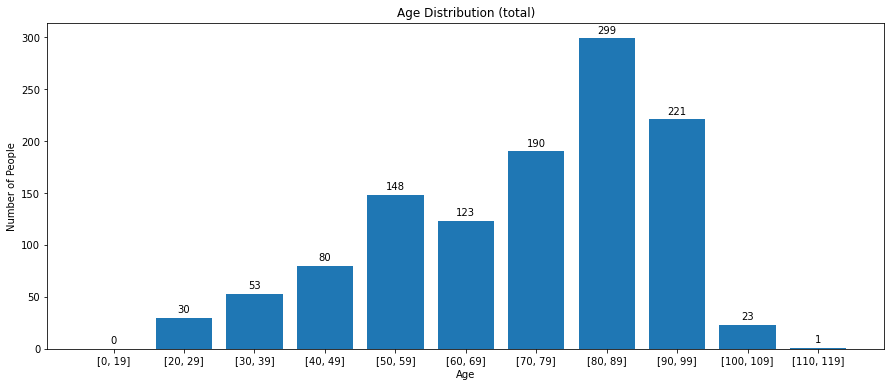

In [16]:
# the age distribution graph
x = np.arange(11)
ages_total = np.zeros(11)
ages_female = np.zeros(11)
ages_male = np.zeros(11)

for key in keys:
    user = user_dict[key]
    if not np.isnan(user["age"]):
        ages_total[int(user["age"]/10)-1] += 1

        # there are some user with unknown gender so we should not take them into consideration in follows
        if user["gender"] == "F":
            ages_female[int(user["age"]/10)-1] += 1
        elif user["gender"] == "M":
            ages_male[int(user["age"]/10)-1] += 1

ticks = ["[0, 19]", "[20, 29]", "[30, 39]", "[40, 49]", "[50, 59]", "[60, 69]", "[70, 79]", "[80, 89]", "[90, 99]", "[100, 109]", "[110, 119]"]
plt.figure(figsize=(15, 6))
plt.bar(x, ages_total, tick_label = ticks)
plt.title("Age Distribution (total)")
plt.ylabel("Number of People")
plt.xlabel("Age")
for i in range(len(ticks)):
    plt.text(x[i], ages_total[i]+5, int(ages_total[i]), horizontalalignment='center', fontsize=10)
plt.show()

We can see that the age of the users ranges from 20 to over 110. For the middle age, the number of people concentrated in 50-59 years old. For the elderly group, we have a peak in 80-89 years old. Most people are older than 70, which makes sense because users here are mainly people with a wide range of care needs. 

Then, I look at the relationships between age and gender.

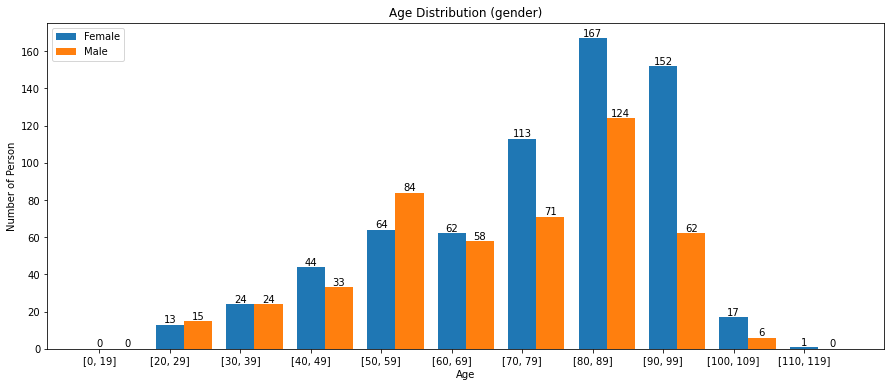

In [17]:
plt.figure(figsize=(15, 6))
plt.bar(x, ages_female, 0.4,  tick_label = ticks, label="Female")
plt.bar(x+0.4, ages_male, 0.4, label="Male")
plt.title("Age Distribution (gender)")
plt.ylabel("Number of Person")
plt.xlabel("Age")
for i in range(11):
    plt.text(x[i], ages_female[i]+1, int(ages_female[i]), horizontalalignment='center', fontsize=10)
    plt.text(x[i]+0.4, ages_male[i]+1, int(ages_male[i]), horizontalalignment='center', fontsize=10)
plt.legend(loc='upper left')
plt.show()

We can see that the number of female in this care home are much larger than the number of males. Although the ratio of men to women is unbalanced, their distributions across age groups are similar, except for those in 90-99 years old. We can see that there are many female users between 80-99 years old; while for the male users, there are many users between 80-89 years old, but there is a considerable decrease in number in 90-99 years old. The possible reason may be that women generally live longer than men, which means some male users may have died when they were 80-89 years old. 

After that, I look at the medical conditions of different age groups.

For a more straightforward analysis, I split users into five age groups according to the New Age Classification - 
- Young Age: from 18 to 44
- Middle Age: from 45 to 59
- Elderly Age: from 60 to 74
- Senile Age: from 75 to 89
- Long-livers: after 90

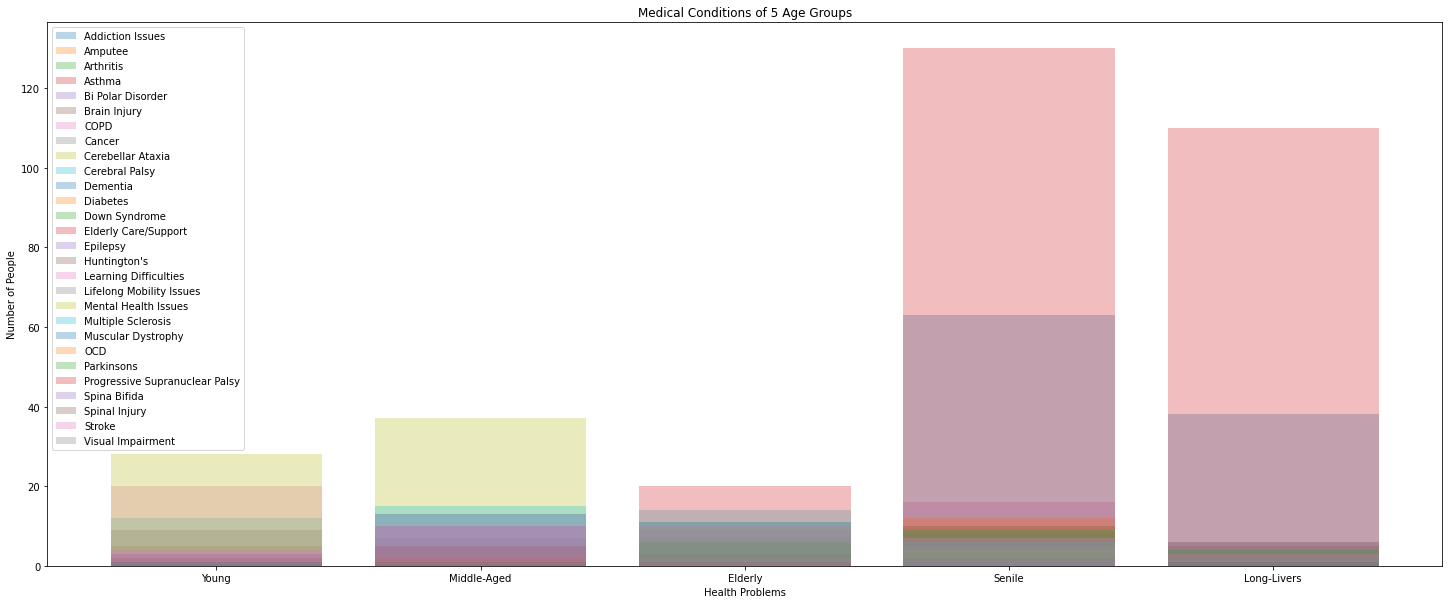

In [18]:
# split all the users into 5 age groups:
# health problems, the last problem is "NaN" so delete it
health_conditions = medical_conditions["CareSysCondition"].tolist()
health_conditions = np.unique(health_conditions)[:-1]

x = np.arange(len(health_conditions))
problem_count_young = np.zeros(len(health_conditions))
problem_count_middle = np.zeros(len(health_conditions))
problem_count_elderly = np.zeros(len(health_conditions))
problem_count_senile = np.zeros(len(health_conditions))
problem_count_longlivers = np.zeros(len(health_conditions))

for key in keys:
    user = user_dict[key]
    if type(user["CareSysCondition"]) != type("string"):
        continue
    index = health_conditions.tolist().index(user["CareSysCondition"])
    #define age group
    if user["age"]<45:
        problem_count_young[index] += 1
    elif user["age"]<60:
        problem_count_middle[index] += 1
    elif user["age"]<75:
        problem_count_elderly[index] += 1
    elif user["age"]<90:
        problem_count_senile[index] += 1
    else:
        problem_count_longlivers[index] += 1
problems = np.array([problem_count_young, problem_count_middle, problem_count_elderly, problem_count_senile, problem_count_longlivers])
problems = problems.transpose().tolist()

# visualization
plt.figure(figsize=(25, 10))
plt.title("Medical Conditions of 5 Age Groups")
plt.xlabel("Health Problems")
plt.ylabel("Number of People")
for i in range(len(problems)):
    plt.bar(range(5), problems[i], label=health_conditions[i], alpha=0.3)
plt.xticks(range(5), ["Young", "Middle-Aged", "Elderly", "Senile", "Long-Livers"])
plt.legend()
plt.show()

This plot gives us a general description of the medical conditions of the users. We can see that the senile group has the most diverse health problems among all the age groups. Regarding the main caring requirements of the users in different age groups, we can see that for the Young Age, their health problems are generally evenly distributed (including Mental Health Issues, Spinal Injury, etc.). For the Middle-aged group, the main concern is Mental Health Issues. It is probably because they face the stress of retirement, changes in the pace of life, and menopause (for women), etc. The elderly, senile, and long-liver groups mainly seek Elderly Care/Support, which should be related to their aging.

For the next step, I start to look at the distribution of user age in different Link Types.

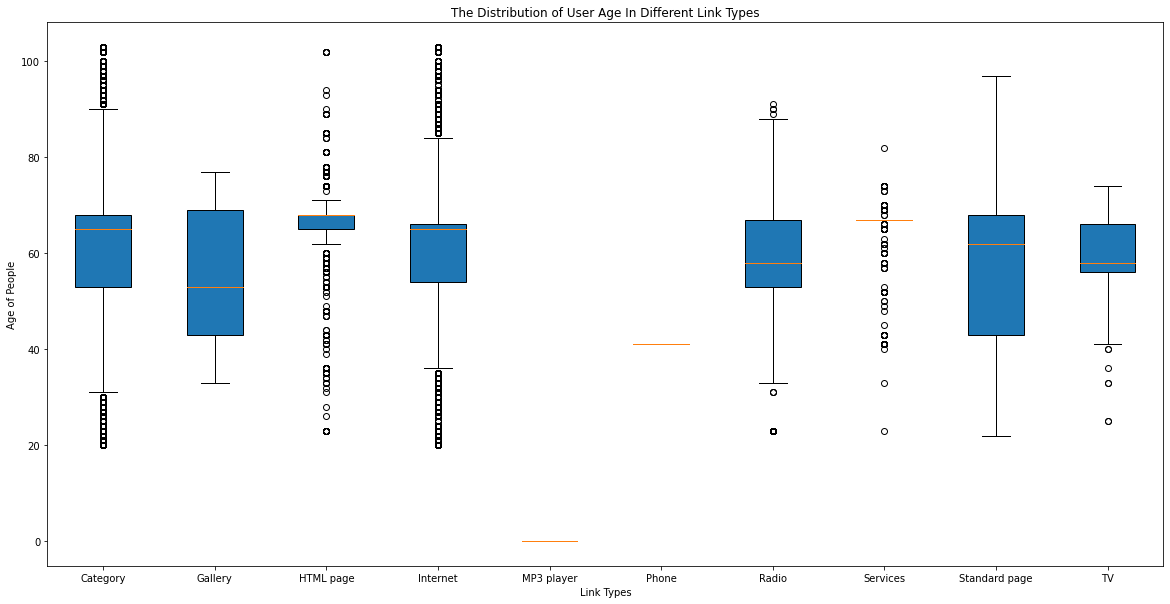

In [19]:
# the distribution of user age in different Link Types
types = ccdate["Link  Type"].tolist()
types = np.unique(types).tolist()

link_types_count = np.zeros(len(types)).tolist()

for key in keys:
    user = user_dict[key]
    visit_records = user["visits"]
    for visit in visit_records:
        if type(visit["type"]) == type("string"):
            index = types.index(visit["type"])
            # if the list is not constructed
            if link_types_count[index] == 0:
                temp = [user["age"]]
                link_types_count[index] = temp
            else:
                link_types_count[index].append(user["age"])
# plot the graph
plt.figure(figsize=(20, 10))
plt.boxplot(link_types_count, patch_artist=True, labels=types)
plt.xlabel("Link Types")
plt.ylabel("Age of People")
plt.title("The Distribution of User Age In Different Link Types")
plt.show()

We can see that the "Category" and "Standard Page" are popular with the broadest age groups, while the "HTML page" is limited within the minimum age range. Besides, "MP3 player", "Phone", and "Services" seem to miss users.

Followed by this, I look at the click rates of Link Types among the five age groups.

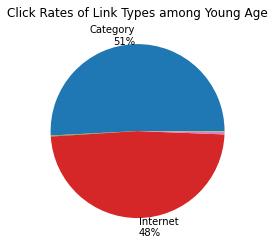

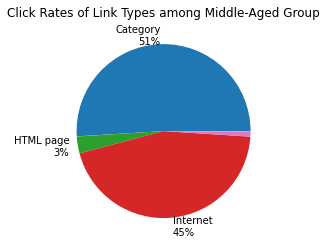

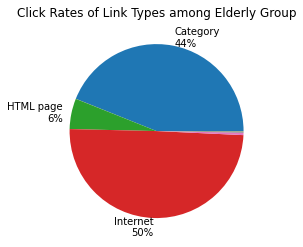

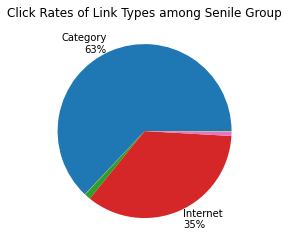

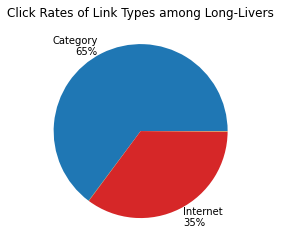

In [20]:
# click rates of Link Types among the five age groups
link_list = np.unique(ccdate["Link  Type"].tolist()).tolist()

link_count_young = np.zeros(len(link_list))
link_count_middle = np.zeros(len(link_list))
link_count_elderly = np.zeros(len(link_list))
link_count_senile = np.zeros(len(link_list))
link_count_longlivers = np.zeros(len(link_list))

for key in keys:
    user = user_dict[key]
    visit_records = user["visits"]
    #define age group
    if user["age"]<45:
        for record in visit_records:
            if type(record["type"]) != type("string"):
                continue
            index = link_list.index(record["type"])
            link_count_young[index] += 1
    elif user["age"]<60:
        for record in visit_records:
            if type(record["type"]) != type("string"):
                continue
            index = link_list.index(record["type"])
            link_count_middle[index] += 1
    elif user["age"]<75:
        for record in visit_records:
            if type(record["type"]) != type("string"):
                continue
            index = link_list.index(record["type"])
            link_count_elderly[index] += 1
    elif user["age"]<90:
        for record in visit_records:
            if type(record["type"]) != type("string"):
                continue
            index = link_list.index(record["type"])
            link_count_senile[index] += 1
    else:
        for record in visit_records:
            if type(record["type"]) != type("string"):
                continue
            index = link_list.index(record["type"])
            link_count_longlivers[index] += 1
            
total_young = sum(np.array(link_count_young))
total_middle = sum(np.array(link_count_middle))
total_elderly = sum(np.array(link_count_elderly))
total_senile = sum(np.array(link_count_senile))
total_longlivers = sum(np.array(link_count_longlivers))

titles_young = []
titles_middle = []
titles_elderly = []
titles_senile = []
titles_longlivers = []

# make titles
for i in range(len(link_list)):
    if link_count_young[i]/total_young<0.02:
        titles_young.append("")
    else:
        titles_young.append(link_list[i]+"\n"+str(round(link_count_young[i]/total_young*100))+"%")
        
    if link_count_middle[i]/total_middle<0.02:
        titles_middle.append("")
    else:
        titles_middle.append(link_list[i]+"\n"+str(round(link_count_middle[i]/total_middle*100))+"%")
        
    if link_count_elderly[i]/total_elderly<0.02:
        titles_elderly.append("")
    else:
        titles_elderly.append(link_list[i]+"\n"+str(round(link_count_elderly[i]/total_elderly*100))+"%")
        
    if link_count_senile[i]/total_senile<0.02:
        titles_senile.append("")
    else:
        titles_senile.append(link_list[i]+"\n"+str(round(link_count_senile[i]/total_senile*100))+"%")
        
    if link_count_longlivers[i]/total_longlivers<0.02:
        titles_longlivers.append("")
    else:
        titles_longlivers.append(link_list[i]+"\n"+str(round(link_count_longlivers[i]/total_longlivers*100))+"%")

# make plots
plt.figure()
plt.pie(link_count_young, labels=titles_young)
plt.title("Click Rates of Link Types among Young Age")
plt.show()

plt.figure()
plt.pie(link_count_middle, labels=titles_middle)
plt.title("Click Rates of Link Types among Middle-Aged Group")
plt.show()

plt.figure()
plt.pie(link_count_elderly, labels=titles_elderly)
plt.title("Click Rates of Link Types among Elderly Group")
plt.show()

plt.figure()
plt.pie(link_count_senile, labels=titles_senile)
plt.title("Click Rates of Link Types among Senile Group")
plt.show()

plt.figure()
plt.pie(link_count_longlivers, labels=titles_longlivers)
plt.title("Click Rates of Link Types among Long-Livers")
plt.show()

These graphs show the most favorable Link Types among the five age groups. We can see that the five groups all have the most frequent visit on "Category" and "Internet". It can be interpreted as at most of the time, the users have care needs which lead to health and wellbeing, and they prefer to engage in entertainment through the Internet like shopping online and watching videos.

After that, I choose one of the most favorable Link Types - "Internet", to make further explorations, so here I make a count for the visiting records of Link Titles among the five age groups.

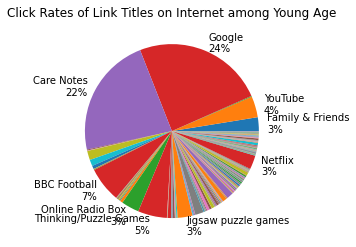

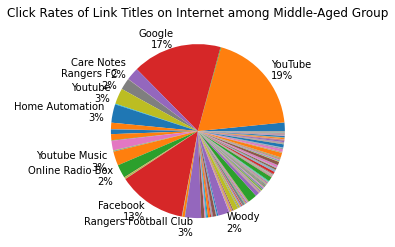

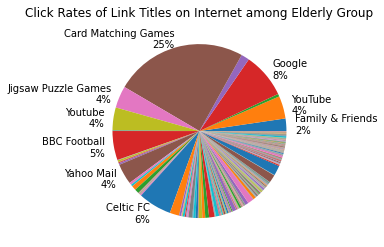

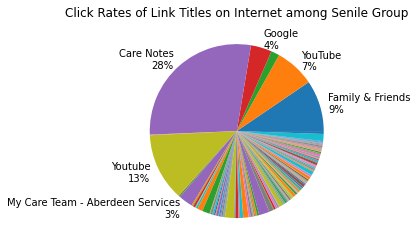

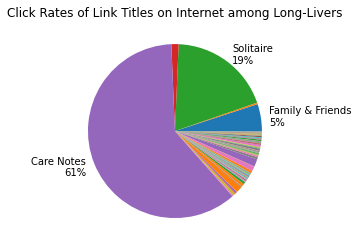

In [21]:
# click rates of Link Titles on "Internet" among the five age groups
temp_matrix = ccdate.values
internet_list = []
for i in range(len(ccdate)):
    if temp_matrix[i][6] == "Internet":
        if temp_matrix[i][5] not in internet_list:
            internet_list.append(temp_matrix[i][5])

internet_count_young = np.zeros(len(internet_list))
internet_count_middle = np.zeros(len(internet_list))
internet_count_elderly = np.zeros(len(internet_list))
internet_count_senile = np.zeros(len(internet_list))
internet_count_longlivers = np.zeros(len(internet_list))

for key in keys:
    user = user_dict[key]
    visit_records = user["visits"]
    #define age group
    if user["age"]<45:
        for record in visit_records:
            if record["type"] != "Internet":
                continue
            index = internet_list.index(record["title"])
            internet_count_young[index] += 1
    elif user["age"]<60:
        for record in visit_records:
            if record["type"] != "Internet":
                continue
            index = internet_list.index(record["title"])
            internet_count_middle[index] += 1
    elif user["age"]<75:
        for record in visit_records:
            if record["type"] != "Internet":
                continue
            index = internet_list.index(record["title"])
            internet_count_elderly[index] += 1
    elif user["age"]<90:
        for record in visit_records:
            if record["type"] != "Internet":
                continue
            index = internet_list.index(record["title"])
            internet_count_senile[index] += 1
    else:
        for record in visit_records:
            if record["type"] != "Internet":
                continue
            index = internet_list.index(record["title"])
            internet_count_longlivers[index] += 1
            
total_young = sum(np.array(internet_count_young))
total_middle = sum(np.array(internet_count_middle))
total_elderly = sum(np.array(internet_count_elderly))
total_senile = sum(np.array(internet_count_senile))
total_longlivers = sum(np.array(internet_count_longlivers))

titles_young = []
titles_middle = []
titles_elderly = []
titles_senile = []
titles_longlivers = []

# make titles
for i in range(len(internet_list)):
    if internet_count_young[i]/total_young<0.02:
        titles_young.append("")
    else:
        titles_young.append(internet_list[i]+"\n"+str(round(internet_count_young[i]/total_young*100))+"%")
        
    if internet_count_middle[i]/total_middle<0.02:
        titles_middle.append("")
    else:
        titles_middle.append(internet_list[i]+"\n"+str(round(internet_count_middle[i]/total_middle*100))+"%")
        
    if internet_count_elderly[i]/total_elderly<0.02:
        titles_elderly.append("")
    else:
        titles_elderly.append(internet_list[i]+"\n"+str(round(internet_count_elderly[i]/total_elderly*100))+"%")
        
    if internet_count_senile[i]/total_senile<0.02:
        titles_senile.append("")
    else:
        titles_senile.append(internet_list[i]+"\n"+str(round(internet_count_senile[i]/total_senile*100))+"%")
        
    if internet_count_longlivers[i]/total_longlivers<0.02:
        titles_longlivers.append("")
    else:
        titles_longlivers.append(internet_list[i]+"\n"+str(round(internet_count_longlivers[i]/total_longlivers*100))+"%")

# make plots
plt.figure()
plt.pie(internet_count_young, labels=titles_young)
plt.title("Click Rates of Link Titles on Internet among Young Age")
plt.show()

plt.figure()
plt.pie(internet_count_middle, labels=titles_middle)
plt.title("Click Rates of Link Titles on Internet among Middle-Aged Group")
plt.show()

plt.figure()
plt.pie(internet_count_elderly, labels=titles_elderly)
plt.title("Click Rates of Link Titles on Internet among Elderly Group")
plt.show()

plt.figure()
plt.pie(internet_count_senile, labels=titles_senile)
plt.title("Click Rates of Link Titles on Internet among Senile Group")
plt.show()

plt.figure()
plt.pie(internet_count_longlivers, labels=titles_longlivers)
plt.title("Click Rates of Link Titles on Internet among Long-Livers")
plt.show()

The users' visiting records are enormously diverse, but we can still point out the 5 top visited sites. These titles vary among different age groups, probably because people of different ages have different interests.

Finally, I look at the distribution of user age In different locations.

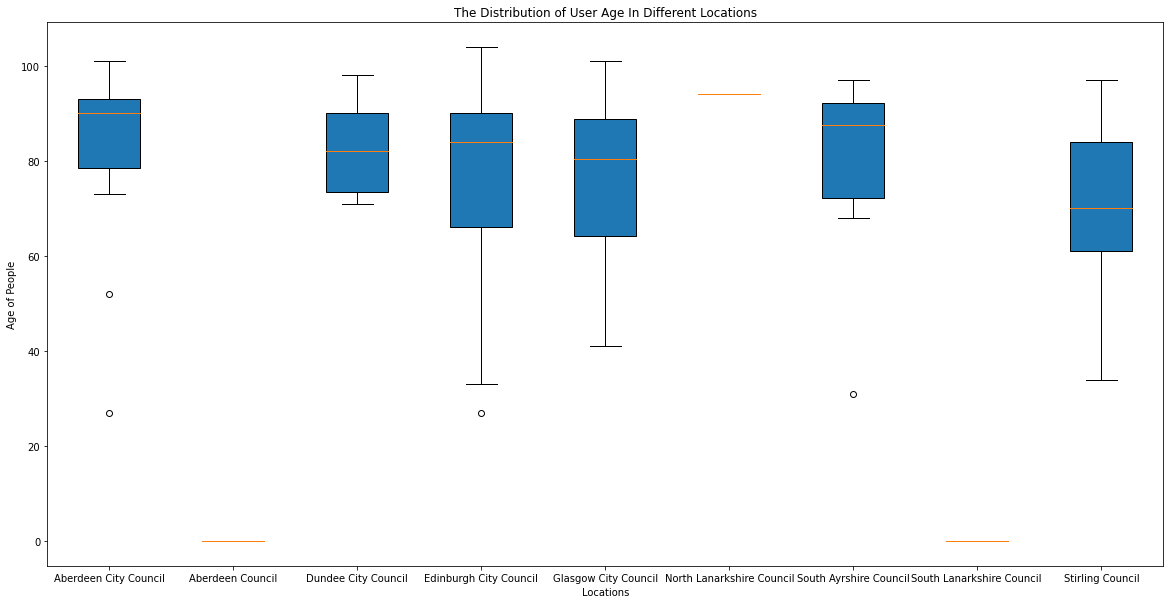

In [22]:
# The Distribution of User Age In Different Locations
locations = users_2021["Location"].tolist()
final_loc = []
for i in range(len(locations)):
    if type(locations[i]) == type("string"):
        locations[i] = locations[i].split("/")
for i in range(len(locations)):
    if type(locations[i]) == type([1]):
        for j in range(len(locations[i])):
            if locations[i][j].split()[-1] == "Council":
                final_loc.append(locations[i][j])
                break
final_loc = np.unique(final_loc).tolist()

location_count = np.zeros(len(final_loc)).tolist()

# count the users from each location
for key in keys:
    user = user_dict[key]
    locations = user["location"]
    if type(locations[0]) == type("string"):
        for i in range(len(locations)):
            if len(locations[i].split("/"))>2 and locations[i].split("/")[2].split()[-1] == "Council":
                # append count
                index = final_loc.index(locations[i].split("/")[2])
                if location_count[index] == 0:
                    location_count[index] = [user["age"]]
                else:
                    location_count[index].append(user["age"])

# plot the graph
plt.figure(figsize=(20, 10))
plt.boxplot(location_count, patch_artist=True, labels=final_loc)
plt.xlabel("Locations")
plt.ylabel("Age of People")
plt.title("The Distribution of User Age In Different Locations")
plt.show()

We can see that the age structure of users is comparatively older in Aberdeen, Dundee, and South Aryshire. In comparison, the age structure of users in Edinburgh, Glasgow, and Stirling is younger. Such differences may be related to the diverse city culture, the ability of residents to accept new services, the economic level, the development of health care in different cities, etc.

Overall, there has to be a connection between age differences and users' care needs & preferences in entertainment activities & health conditions & etc. For BlackWood, the relationships between these factors are pretty meaningful when providing services. In order to consolidate user stickiness and ensure their engagement, it is essential to pay attention to users' age composition, such as the physical and psychological characteristics of different age groups. Only in this way can the platform better target specific entertainment features to particular age groups. For the users themselves, such relationships are also of great importance. For example, they could better enable them to find what entertainment features people of their age and health conditions like to engage in. In this way, they can easily find playfellows, showing more active engagement, which has a considerable impact on their health and wellbeing.

# Reflect and Hypothesise

Based on the analysis, I firstly found that age differences are related to different health conditions, care needs, preferences in entertainment features, etc. For example, there are apparent differences among the visiting frequency of entertainment features that the five age groups use. It may be because people tend to have different interests during different age periods, and their health conditions at different ages make them have different preferences in entertainment features. It has a lot to explore with the nature of the entertainment features and characteristics of the users (especially users in the elderly, senile, and long-livers group, because a large part of the users are over 70 years old).

In addition, the characteristics of gender also deserve attention. From the plot of Age Distribution (gender), we can see that there were more women than men in most age groups, indicating females may have more vital care needs than males. It got me thinking about that relating to the world, whether women are more vulnerable than men in certain situations. The answer seems to be yes. There are many cases in real life. For example, the driver's seat of a car is designed according to the body shape of a standard man, resulting in invisible gender inequality. So back to the platform, it may be necessary to explore further whether there is any gender inequality in its service provision.

I also found different age structures of users in various cities across Scotland, which may be related to the diverse city culture, the ability of residents to accept new services, the economic level, the development of health care in different cities, etc. The relationships among these factors may be worthy of exploration. For example, suppose BlackWood can effectively target specific entertainment features in particular areas. In that case, it can not only rationally allocate human and material resources but also enhance the attractiveness of the platform to users.

The data would be valuable for both the Blackwood (in terms of development support and policy work) and the users themselves (in terms of user experience) if presented in an accessible form.

The hypotheses that came up as exploring the data are as follows.

- The first hypothesis is that women are more active in seeking care needs than men. In the plot of Age Distribution (gender), we can see that although men and women share a similar distribution across age groups, the total number of men is much smaller than women. To test the hypothesis, we can first check if there are fewer male users than female users over the years from 2018 to 2021. Then, we can further analyze the relationships between "Gender" and "Link Types", especially the proportion of "Services" and "category" in "Link Types", because these two portions represent seeking help and health-related care assistance, respectively. In addition, a feasible way may be taking interviews with the male and female users or asking the data owner to gain more subjective information.


- The second hypothesis is that middle-aged people are more likely to suffer from mental health issues. We can see from the graph "Medical Conditions of the 5 Age Groups" that a large portion of middle-aged people seek help on mental health issues. It is a more severe problem, although the number of people suffering from such issues is much smaller than the number of older people who need elderly care/support, which tends to be expected for the aged. To test the hypothesis, I may need to cluster mental health-related requests or online entertainment activities in "Link Titles" and analyze the results with age composition. Besides, it can be further verified by collecting enriching data from further studies in the fields of Medicine and Psychology.


- The third hypothesis is that intelligence-related activities are likely to impact health and contribute to a longer life positively. As we can see from "Click Rates of Link Titles on the Internet among Long-Livers" and "Click Rates of Link Titles on the Internet among Elderly Group", both the long-livers and the elderly tend to have a frequent visit on intelligence-related games, such as solitaire and card matching games. The possible reason may be that such games are beneficial in exercising users' physical and mental abilities. To test the hypothesis, we could cluster intelligence-related Link Titles in other Link Types (in addition to "Internet") and analyze the results with age composition. It can also be further verified by collecting richer data in relevant fields. 